<a href="https://colab.research.google.com/github/otavioml/Chess-Data-Analysis/blob/main/Chess_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de partidas de xadrez do Lichess

##Imports e leitura da base de dados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [3]:
plt.rcParams['figure.figsize']  = (16, 14)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/otavioml/Chess-Data-Analysis/main/Chess100k.csv')

## Limpeza dos dados e adição de novas colunas

In [6]:
#Limpeza dos dados
#Padronização do tipo da coluna Numer_of_Moves
df['Number_of_Moves'] =  pd.to_numeric(df['Number_of_Moves'], errors='coerce')

#Remoção das partidas com menos de 3 movimentos que foram abandonadas ou terminadas por tempo
condition = (df['Number_of_Moves'] >= 3) | (df['Termination'] == 'Normal')
df = df.loc[condition]

#limpeza das linhas nulas
df = df.dropna()

In [8]:
#Adição das colunas média e razão
#RatioElo = Maior elo da partida dividido pelo menor elo da partida, quanto mais próximo de 1 mais igual foi a disputa
df['RatioElo'] = df.apply(lambda x: x['BlackElo']/x['WhiteElo'] if x['BlackElo']>x['WhiteElo'] else x['WhiteElo']/x['BlackElo'], axis = 1)
df['MatchElo'] = (df['BlackElo']+df['WhiteElo'])/2

#Colunas de interesse
df = df[['WhiteElo','BlackElo','RatioElo','MatchElo','Winner','InitialTime','Increment','TimeControl','Opening','ECO','Number_of_Moves','Site']]
df.shape

(99569, 12)

##Dataframe Final e Estatísticas

In [9]:
df.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,Site
0,1639,1403,1.168211,1521.0,White,600,8,Rapid,French Defense: Normal Variation,C00,13,https://lichess.org/j1dkb5dw
1,1654,1919,1.160218,1786.5,White,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18,https://lichess.org/a9tcp02g
2,1643,1747,1.063299,1695.0,White,420,17,Rapid,Four Knights Game: Italian Variation,C50,11,https://lichess.org/szom2tog
3,1824,1973,1.081689,1898.5,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47,https://lichess.org/rklpc7mk
4,1765,1815,1.028329,1790.0,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23,https://lichess.org/1xb3os63


In [11]:
#Short description of the dataframe
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,WhiteElo,BlackElo,RatioElo,MatchElo,InitialTime,Increment,Number_of_Moves
count,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00
mean,1606.69,1596.46,1.11,1601.58,300.89,2.91,34.01
std,202.38,207.59,0.10,178.19,288.00,4.39,16.23
min,782.00,789.00,1.00,974.50,0.00,0.00,1.00
25%,1476.00,1464.00,1.04,1478.50,120.00,0.00,23.00
50%,1602.00,1589.00,1.08,1594.00,240.00,1.00,32.00
75%,1740.00,1733.00,1.15,1720.00,360.00,5.00,43.00
max,2403.00,2386.00,2.34,2264.00,1800.00,30.00,153.00


##Primeiras Visualizações

In [13]:
#df.hist(bins=20, column=['WhiteElo', 'BlackElo', 'RatioElo', 'MatchElo', 'Number_of_Moves'],edgecolor='black',)
titles = ('MatchElo', 'Number_of_Moves')
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles= titles
)

fig.add_trace(
    go.Histogram(x=df['MatchElo'], nbinsx=50),
    row = 1, col = 1
)
fig.update_xaxes(title_text='Rank Médio da Partida', row=1, col=1)

fig.add_trace(
    go.Histogram(x=df['Number_of_Moves'],nbinsx=50),
    row = 1, col = 2
)
fig.update_xaxes(title_text='Número de Movimentos da Partida', row=1, col=2)

fig.update_layout(showlegend=False,
                  height=400, width=900,
                  title_text='Visão Geral (Histogramas)')

In [14]:
titles = ('RatioElo', 'InitialTime')
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles= titles
)
fig.add_trace(
    go.Box(y=df['RatioElo'], boxpoints=False),
    row = 1, col = 1
)
fig.update_yaxes(title_text='Elo', row=1, col=1)

fig.add_trace(
    go.Box(y=df['InitialTime'], boxpoints=False),
    row = 1, col = 2
)
fig.update_yaxes(title_text='Tempo(s)', row=1, col=2)

fig.update_layout(showlegend=False,
                  height=450, width=900,
                  title_text='Visão Geral (Boxplots)')


##Análises Iniciais
#### A fazer: Criar Intervalo de confiança e testar se a diferença entre o número de vitórias de brancas e pretas pode ser explicado pelo acaso

In [21]:
df_winner = df[df['Winner'] != 'Draw'].groupby('Winner').count()['ECO'] #Número de vitórias de cada cor
fig = px.bar(df_winner, x=df_winner.index, y='ECO')
fig.update_layout(height=450, width=500, title_text='Vitórias por cor')
fig.update_yaxes(title_text='Vitórias')
fig.update_xaxes(title_text='Cor')
fig.show()

In [48]:
#10 most frequent opening
df_countWhiteWins = df.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    7795
C00    5024
B00    5021
A40    4945
D00    4312
B01    4184
C41    3804
C20    3769
B20    2752
D02    2107
Name: Winner, dtype: int64

In [ ]:
#Average moves per
df_averageMovesPerGame = df['Number_of_Moves'].mean()
df_averageMovesPerGame

34.074715034528666

<BarContainer object of 3 artists>

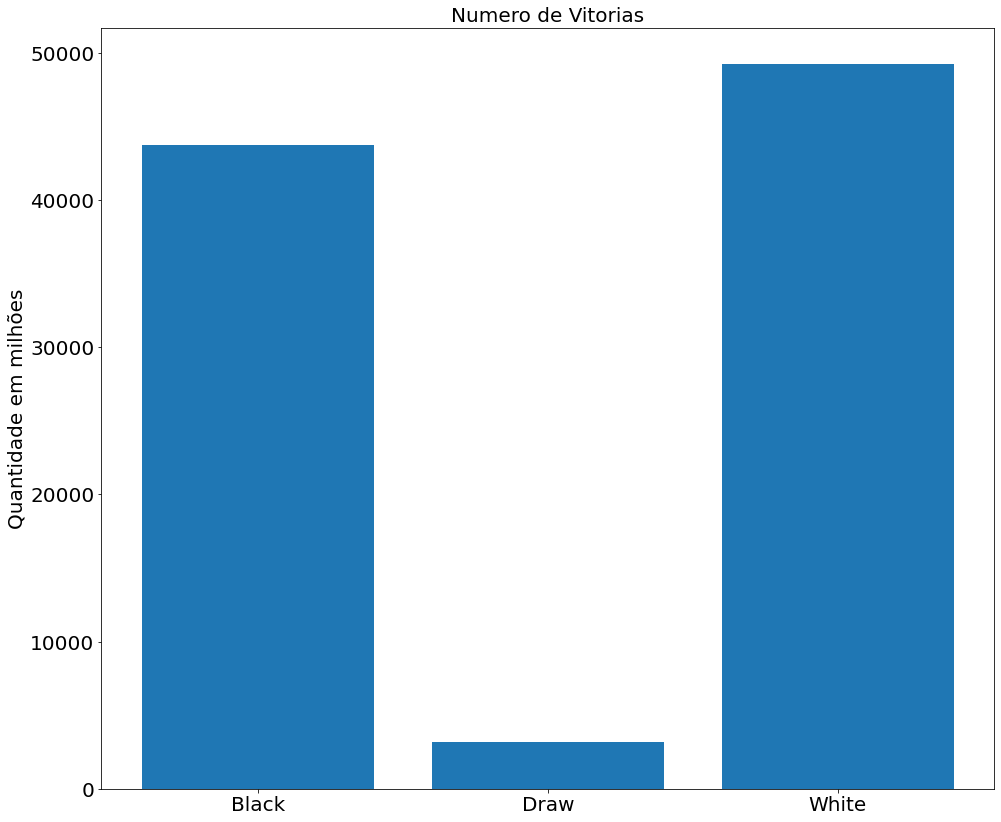

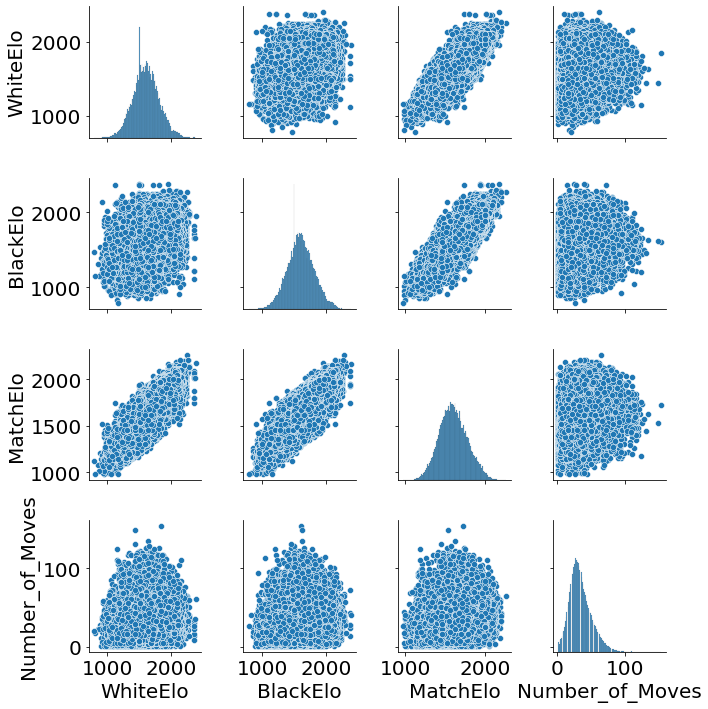

In [ ]:
sns.pairplot(df[['WhiteElo','BlackElo','MatchElo','Number_of_Moves']])

In [ ]:
BlackBranch = df[df['Winner'] == 'Black']
BlackBranch.head()


,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,IT_Zscore,Inc_Zscore
3,1824,1973,1.081689,1898.5,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47,-0.836450,-0.436532
4,1765,1815,1.028329,1790.0,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23,-0.836450,-0.436532
6,1541,1500,0.973394,1520.5,Black,300,0,Blitz,"Italian Game: Classical Variation, Giuoco Pian...",C53,19,-0.003105,-0.664506
9,1522,1428,0.938239,1475.0,Black,180,5,Blitz,Englund Gambit Complex: Hartlaub-Charlick Gambit,A40,45,-0.419778,0.475363
10,1644,1544,0.939173,1594.0,Black,600,8,Rapid,Modern Defense,B06,37,1.038577,1.159285


In [ ]:
WhiteBranch = df[df['Winner'] == 'White']
WhiteBranch.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,IT_Zscore,Inc_Zscore
0,1639,1403,0.856010,1521.0,White,600,8,Rapid,French Defense: Normal Variation,C00,13,1.038577,1.159285
1,1654,1919,1.160218,1786.5,White,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18,0.621904,-0.208558
5,1477,1487,1.006770,1482.0,White,300,3,Blitz,Owen Defense,B00,32,-0.003105,0.019416
7,1765,1752,0.992635,1758.5,White,540,0,Rapid,English Opening: The Whale,C20,28,0.830240,-0.664506
8,1445,1169,0.808997,1307.0,White,900,0,Rapid,Old Benoni Defense,A43,37,2.080258,-0.664506


In [ ]:
df_countWhiteWins = WhiteBranch.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    3518
A40    2709
B00    2541
C00    2403
B01    2180
D00    2154
C41    2087
C20    1663
B20    1126
D02    1082
Name: Winner, dtype: int64

In [ ]:
df_countWhiteWins = BlackBranch.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    3943
C00    2322
B00    2206
A40    1931
C20    1840
D00    1839
B01    1683
B20    1497
C41    1460
D02     818
Name: Winner, dtype: int64